<a href="https://colab.research.google.com/github/jmijares4/DS-portfolio/blob/main/movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import seaborn as sns
import numpy as np

df = pd.read_csv('movies.csv')
df.head()

In [ ]:
#Missing data

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect     object
dtype: object

In [ ]:
#To see all data
pd.set_option('display.max_rows', None)

####My hypotesis:
######Budget might have high correlation with gross revenue
######Company might also have high correlation with gross revenue

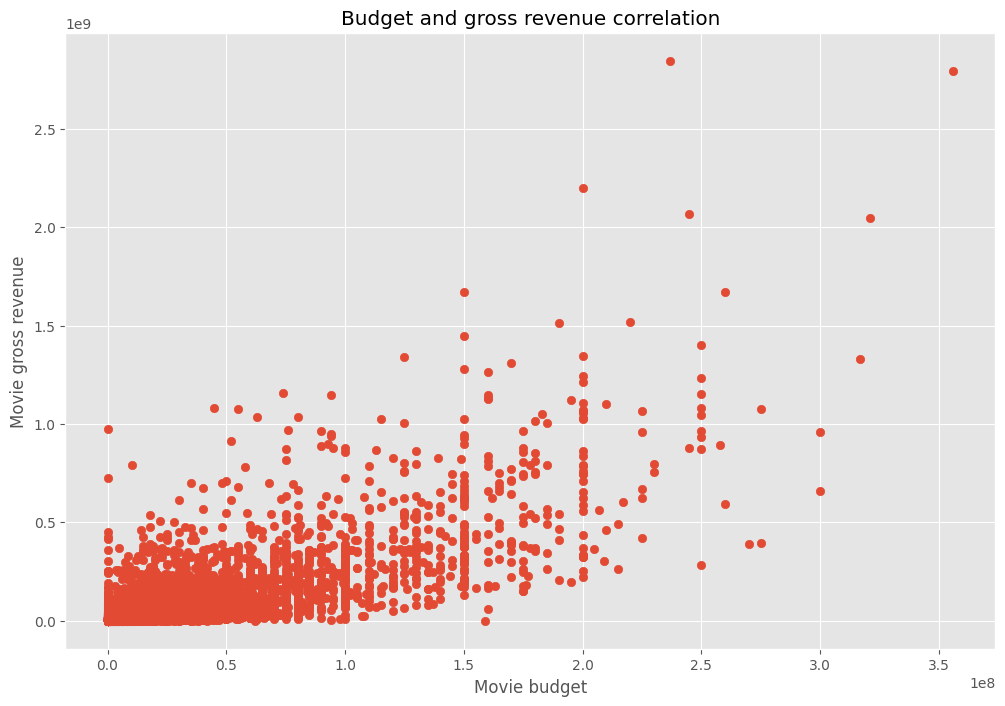

In [ ]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget and gross revenue correlation')
plt.xlabel('Movie budget')
plt.ylabel('Movie gross revenue')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

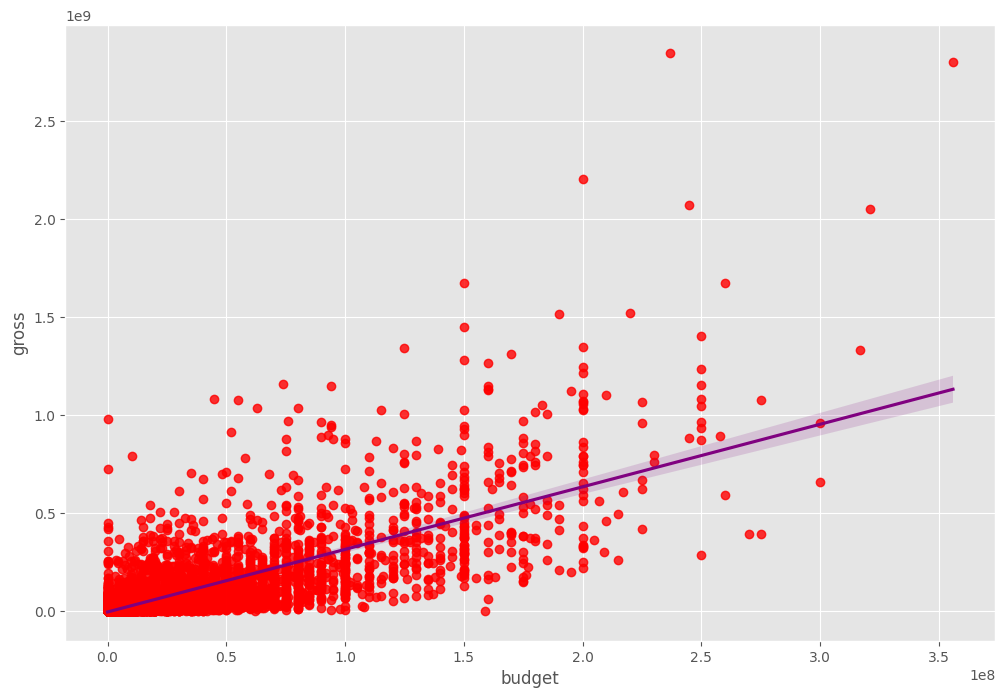

In [ ]:
#Using seaborn, still budget vs gross revenue to show correlation with more clarity
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={"color":"red"}, line_kws={"color":"purple"})

#####The R**2 will be low after calculating the ecuation, but there is a clear positive correlation.

In [ ]:
#I want to see the table from for all numeric columns in my dataframe

#Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

#Calculate correlation matrix
df[numeric_cols].corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


####There is a correlation coefficient of 0.75, so there is a strong positive relationshib between the budget and the gross revenue of the movies.

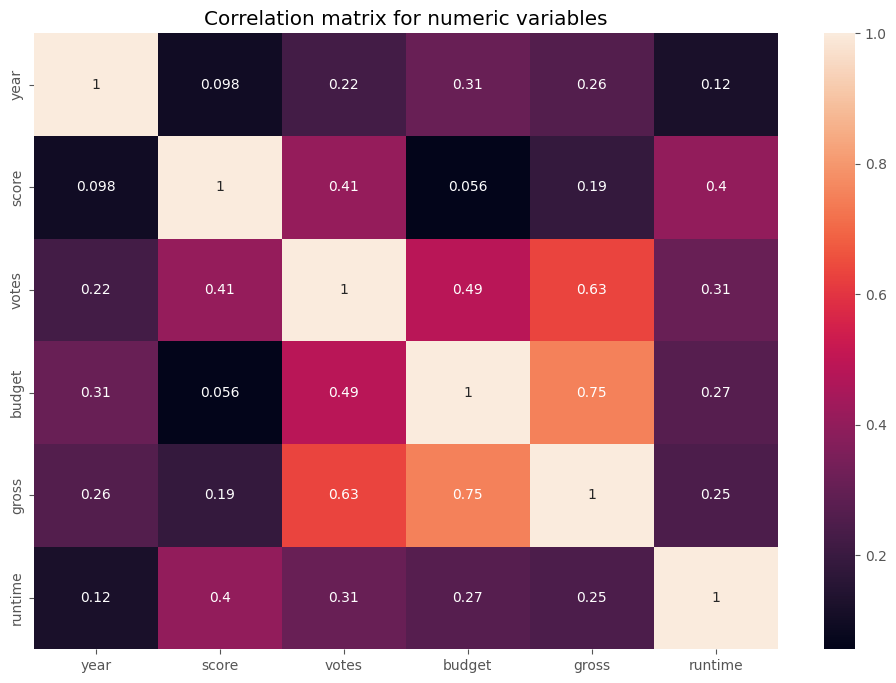

In [ ]:
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric variables')
plt.show()

##Looking at companies

####Those can´t be included in the correlation matrix since companies aren´t numerical.


In [ ]:
df.sort_values(by=["gross"], inplace=False, ascending=False)
df_numerized = df

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

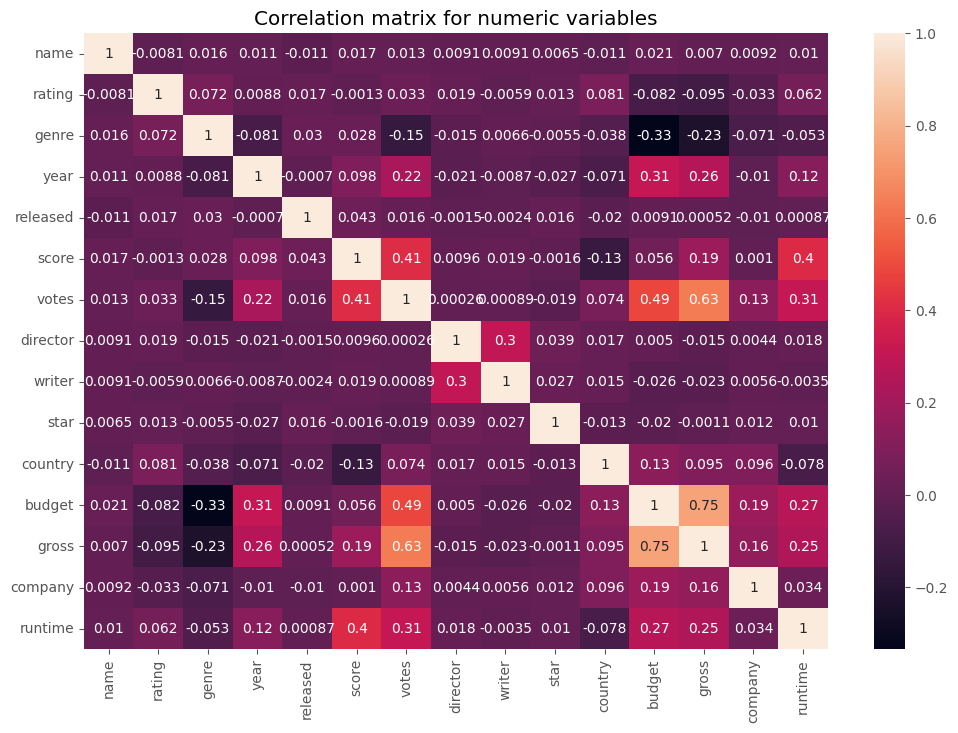

In [ ]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric variables')
plt.show()

In [ ]:
#To see correlation coefficients in order for easier reading.
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

In [ ]:
#Filtering high correlation pairs
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.632834
votes     gross       0.632834
budget    gross       0.750157
gross     budget      0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

<Axes: xlabel='company', ylabel='gross'>

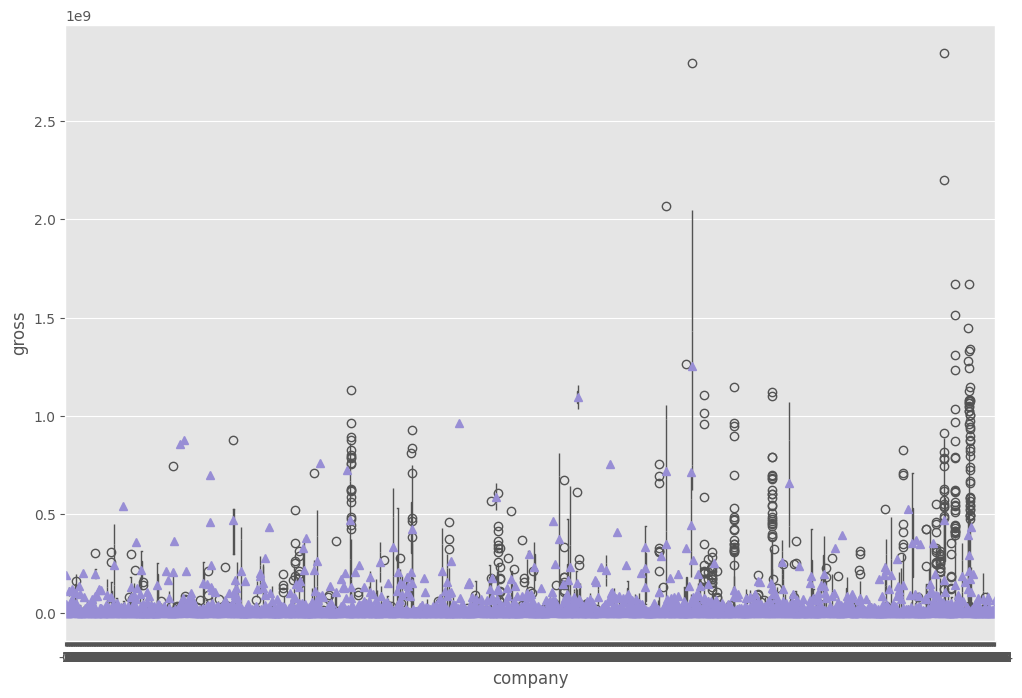

In [ ]:
sns.boxplot(
    x = df['company'],
    y = df['gross'],
    showmeans=True,
    data=df
)

####While there may not be a perfect linear correlation between a company's identity and its gross revenue, it is true that some companies are more successful than others and generate higher revenue.

###The values that make a more positive coefficient of correlation to the gross revenue are the butget for the movie and the votes the movie receives. I´ts important to take in account that the votes are a "a posteriori" variable, so it can´t be used to predict if a movie will be economicaly successful, however, analyzing the correlation between votes and gross revenue can be insightful for understanding audience preferences and potential future success for similar movies.